In [11]:
import sympy as sp
import numpy as np
import math
from itertools import product
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Zadanie 13

#### Działa dla każdego sąsiedztwa 1, 2, 3, ...

In [3]:
def define_symbols(n):
    return [sp.symbols(f'x{i}') for i in range(n)]


def check_lut(lut):
    power = math.log2(len(lut))
    return all(0 <= num <= 1 for num in lut) and power.is_integer() and power % 2 == 1 and power > 2

In [4]:
def get_ca_polynomial(lut):
    if check_lut(lut):
        power = int(math.log2(len(lut)))
        triple_bits = [list(tup) for tup in list(product([1, 0], repeat=power))]
        symbols = define_symbols(power)

        polynomial_terms = []
        for i, bits in enumerate(triple_bits):
            term = np.prod([(symbol if bit == 1 else 1 - symbol) for bit, symbol in zip(bits, symbols)]) * lut[i]
            polynomial_terms.append(term)

        polynomial_expression = sp.Add(*polynomial_terms)
        return polynomial_expression

    else:
        raise Exception("Invalid LUT...")



In [5]:
lut1 = [0.1, 1, 0, 0, 0, 0, 1, 0.1]
polynomial2 = get_ca_polynomial(lut1)
print(f"Polynomial N1: {polynomial2}\n")

lut2 = [0.1, 1, 0, 0, 0, 0, 1, 0.1, 0.1, 1, 0, 0, 0, 0, 1, 0.1, 0.1, 1, 0, 0, 0, 0, 1, 0.1, 0.1, 1, 0, 0, 0, 0, 1, 0.1]
polynomial2 = get_ca_polynomial(lut2)
print(f"Polynomial N2: {polynomial2}")

Polynomial N1: 0.1*x0*x1*x2 + x0*x1*(1 - x2) + x2*(1 - x0)*(1 - x1) + 0.1*(1 - x0)*(1 - x1)*(1 - x2)

Polynomial N2: 0.1*x0*x1*x2*x3*x4 + x0*x1*x2*x3*(1 - x4) + x0*x1*x4*(1 - x2)*(1 - x3) + 0.1*x0*x1*(1 - x2)*(1 - x3)*(1 - x4) + 0.1*x0*x2*x3*x4*(1 - x1) + x0*x2*x3*(1 - x1)*(1 - x4) + x0*x4*(1 - x1)*(1 - x2)*(1 - x3) + 0.1*x0*(1 - x1)*(1 - x2)*(1 - x3)*(1 - x4) + 0.1*x1*x2*x3*x4*(1 - x0) + x1*x2*x3*(1 - x0)*(1 - x4) + x1*x4*(1 - x0)*(1 - x2)*(1 - x3) + 0.1*x1*(1 - x0)*(1 - x2)*(1 - x3)*(1 - x4) + 0.1*x2*x3*x4*(1 - x0)*(1 - x1) + x2*x3*(1 - x0)*(1 - x1)*(1 - x4) + x4*(1 - x0)*(1 - x1)*(1 - x2)*(1 - x3) + 0.1*(1 - x0)*(1 - x1)*(1 - x2)*(1 - x3)*(1 - x4)


# Zadanie 14

In [21]:
def generate_neighborhoods(configuration, n):
    views = []
    for shift in range(-n, n + 1):
        views.append(np.roll(configuration, shift))
    stacked_views = np.stack(views, axis=0)
    return stacked_views


def wolfram_rule_to_lut(rule_num):
    return np.array([int(x) for x in bin(rule_num)[2:].zfill(8)], dtype=np.uint8)


def visualize(history):
    history = np.array(history, dtype=float)
    plt.imshow(history, cmap='binary')
    plt.xlabel('Cell Index')
    plt.ylabel('Time Step')
    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.show()


Moja wersja (mało optymalna) :)

In [31]:
# def acca_space_time(clut, initial_conf, step):
#     n = int((math.log2(len(clut)) - 1) / 2)
#     polynomial = get_ca_polynomial(clut)
#     diagram = [initial_conf]
#     conf = initial_conf
# 
#     for _ in range(step):
#         neighborhoods = generate_neighborhoods(conf, n)
#         num_columns = neighborhoods.shape[1]
#         results = []
# 
#         for i in range(num_columns):
#             subs_dict = {f'x{j}': neighborhoods[j, i] for j in range(neighborhoods.shape[0])}
#             evaluated = polynomial.subs(subs_dict).evalf()
#             results.append(evaluated)
# 
#         conf = results
#         diagram.append(results)
# 
#     visualize(diagram)


Usprawniona

In [ ]:
def acca_space_time(clut, initial_conf, step):
    n = int((math.log2(len(clut)) - 1) / 2)
    polynomial = get_ca_polynomial(clut)
    diagram = [initial_conf]
    conf = initial_conf

    func = sp.lambdify(define_symbols(2 * n + 1), polynomial, 'numpy')

    for _ in range(step):
        neighborhoods = generate_neighborhoods(conf, n)
        conf = func(*neighborhoods)
        diagram.append(conf.copy())

    visualize(diagram)

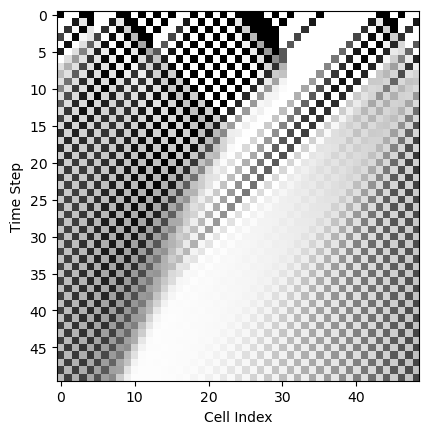

In [45]:
traffic = wolfram_rule_to_lut(184)
majority = wolfram_rule_to_lut(232)
alpha = 0.9
traffic_majority_clut = alpha * traffic + (1 - alpha) * majority
conf = np.random.randint(0, 2, 49)
#conf = [1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0]

acca_space_time(traffic_majority_clut, conf, 49)